In [8]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
!pip install ucamcl --upgrade
import ucamcl
import math, random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import pandas
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline

Requirement already up-to-date: ucamcl in /home/yiyi/myPyEnv/lib/python3.6/site-packages (1.0.2)
You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Part a
## Question 1

In [1]:
def pairs (n):
    m = np.random.permutation(n).reshape((2,n//2))
    return (m[0], m[1])

GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2a')
q = GRADER.fetch_question('q1')
m1,m2 = pairs(q.n)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER.submit_answer(q, ans)

Waiting for you to log in .... done.
Correct!


True

## Question 2

In [2]:
def kinetic_exchange(v, w):
    R = np.random.rand(1,len(v))
    return R * (v + w), (1 - R) * (v + w)

GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2a')
q = GRADER.fetch_question('q2')
v,w = np.linspace(1,5,q.n), np.linspace(1,2,q.n)**q.p
vnew,wnew = kinetic_exchange(v,w)
ans = {'m1': np.mean(vnew), 's2': np.std(wnew)}
GRADER.submit_answer(q, ans)

Waiting for you to log in ..... done.
Correct!


True

## Question 3

In [7]:
def gini(w):
    w = np.sort(w)
    N = len(w)
    i = np.arange(1,N+1)
    return 2 * np.sum(i * w) / (N * np.sum(w)) - (1 + 1/N)

GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2a')
q = GRADER.fetch_question('q3')
w = np.linspace(0,1,q.n)**q.p
g = gini(w)
GRADER.submit_answer(q, {'g': g})

Waiting for you to log in .. done.
Correct!


True

## Question 4

In [9]:
def sim(N,T):
    wealth = np.full(N, fill_value = 1.0)
    gs = np.zeros(T)
    for i in range(1, T):
        m1, m2 = pairs(N)
        vin = wealth[m1]
        win = wealth[m2]
        vnew, wnew = kinetic_exchange(vin,win)
        wealth[m1] = vnew
        wealth[m2] = wnew
        gs[i] = gini(wealth)
    return(wealth, gs)

GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2a')
q = GRADER.fetch_question('q4')
w,gs = sim(q.n, q.t)
ans = {'gm': np.mean(gs[int(q.t/2):]), 'gs': np.std(gs[int(q.t/2):]), 'ws': np.std(w)}
GRADER.submit_answer(q, ans)

Waiting for you to log in .. done.
Correct!


True

## Question 5

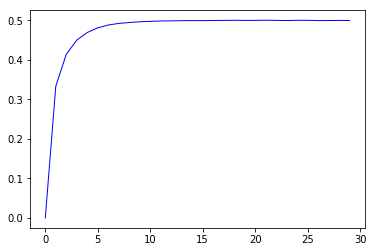

In [11]:
w, gs = sim(500000,30)
plt.plot( np.arange(30) ,gs, linestyle='-', linewidth=1, color='blue')
plt.show()

# Part b

## Question 6

In [16]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2b')
q = GRADER.fetch_question('q6')
GRADER.submit_answer(q, (25-5-4*2)/25)

Waiting for you to log in .. done.
Correct!


True

## Question 7

In [13]:
def mobility(v, w):
    before_quintile = np.digitize (v, np.percentile(v, np.linspace(20,100,5)))
    after_quintile = np.digitize (w, np.percentile(w, np.linspace(20,100,5)))
    change = np.absolute (before_quintile - after_quintile)
    morethan1 = change[np.where(change>1)]
    return (len(morethan1)/len(v))

GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2b')
q = GRADER.fetch_question('q7')
v,w = np.arange(q.n)**q.a, np.arange(q.n)**q.a * np.random.random(q.n)
GRADER.submit_answer(q, mobility(v,w))

Waiting for you to log in .... done.
Correct!


True

## Question 8

In [14]:
def simulation(N, qt):
    def furtherSim(T):
        wealth = np.full(shape=(T,N), fill_value = 1.0)
        for i in range(1, T):
            m1, m2 = pairs(N)
            vin = wealth[i-1][m1]
            win = wealth[i-1][m2]
            vnew, wnew = kinetic_exchange(vin,win)
            wealth[i][m1] = vnew
            wealth[i][m2] = wnew
        return wealth

    w = furtherSim(200+qt)
    ans = mobility(w[199], w[199+qt])
    return ans

GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment2b')
q = GRADER.fetch_question('q8')
GRADER.submit_answer(q, simulation(q.n, q.t))

Waiting for you to log in .. done.
Correct!


True

## Question 9

[0.       0.290952 0.40067  0.44504  0.462984 0.472098 0.475614 0.477312
 0.479688 0.479466 0.47993  0.478924 0.47933  0.480634 0.47968  0.479456
 0.479916 0.480176 0.480256 0.47928  0.48017  0.481168 0.48039  0.479198
 0.479758 0.479576 0.479138 0.480708 0.479612 0.479618]


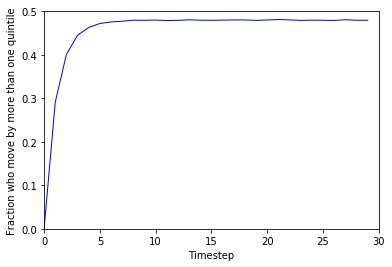

In [18]:
y = np.full(30, 0.0)
for i in range(30):
    y[i] = simulation(500000, i)
print(y)
plt.plot( np.arange(30) ,y, linestyle='-', linewidth=1, color='blue')
plt.ylabel("Fraction who move by more than one quintile")
plt.xlabel("Timestep")
plt.axis([0,30,0,0.5])
plt.show()